# Digit Recogniser on Kaggle with CNN (Tensorflow)

With trememndous help from this Kaggle notebook by Yassine Gouzham: https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook

Main difference is a greatly simplified CNN model.

## Import dependencies and load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, RandomRotation
from keras.callbacks import ReduceLROnPlateau

np.random.seed(1)

Nulls in X:
count       784
unique        1
top       False
freq        784
dtype: object

Nulls in test set:
count       784
unique        1
top       False
freq        784
dtype: object


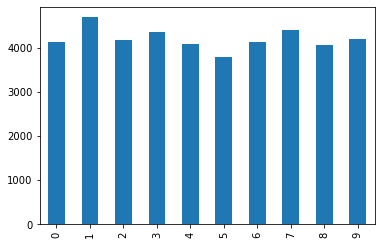

In [4]:
x = pd.read_csv('C:/Users/user/Documents/coding/digit class/train.csv')
test = pd.read_csv('C:/Users/user/Documents/coding/digit class/test.csv')

y = x.label
x = x.drop('label', axis=1)
y.value_counts().sort_index().plot(kind='bar')

print(f'Nulls in X:\n{x.isnull().any().describe()}\n')
print(f'Nulls in test set:\n{test.isnull().any().describe()}')

## Some preprocessing

In [5]:
y = to_categorical(y, num_classes=10)

# reshape to 42000 rows of 28x28x1 (1 channel since images are grayscale)
x = x.values.reshape((-1,28,28,1))
test = test.values.reshape((-1,28,28,1))

# split 20% test set, and stratify to make sure distribution of labels stays roughly similar to the complete set
xtrain, xval, ytrain, yval = train_test_split(x,y,test_size = 0.2, random_state=1, stratify=y)

## CNN Model with learning rate reduction on plateau

In [6]:
model = Sequential([keras.Input((28,28,1)),
    Rescaling(1./255),                     
    RandomRotation(0.1),
    # base
    Conv2D(32, (5,5), activation='relu'),  #24*24 feature map
    Conv2D(32, (5,5), activation='relu'), #20*20
    MaxPool2D(pool_size=(2,2)), #10*10
    Dropout(0.25),
    # head
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [7]:
hist = model.fit(x=xtrain,y=ytrain,epochs=10,validation_data=(xval,yval),callbacks=[lrr])

Epoch 1/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.2672 - accuracy: 0.9170 - val_loss: 0.0921 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 2/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.1060 - accuracy: 0.9668 - val_loss: 0.0726 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 3/10
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0773 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 4/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0660 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 5/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0648 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 6/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0629 - accuracy: 0.9810 - val_loss: 0.0541 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 7/10
1050/1050 [========================

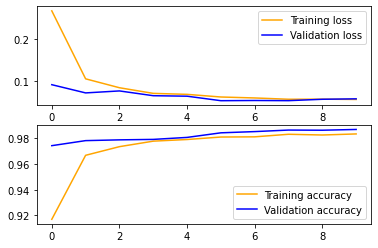

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='orange', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='b', label="Validation loss")
legend=ax[0].legend()

ax[1].plot(hist.history['accuracy'], color='orange', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend()

We see a smooth increase in validation accuracy and decrease in validation loss over 10 epochs, with little sign of overfitting. Training accuracy and loss plateaued.

## Result:
The model predictions achieved a score of 0.98628 on the private test set.